

# Project: Investigate a Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), This dataset downloaded from Kaggle. The dataset contain 21 attribute, this include popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average and release year. 
> - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis
> - Q1: What is the most year that has released many movies?
> -Q2: Does vote average affect profits?
> -Q3: Does popularity affect profits? 

In [1]:
# Set up import statements for all of the packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> First, I will load and read the data, then use some helpful method for assessing and building intuition about the dataset and decide if it's need cleanliness.


### General Properties


In [2]:
# read the data
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Assessing and Building Intuition
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Check about the data type, non-null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# check the number of row and col
df.shape

(10866, 21)

In [6]:
# useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# data type for each col
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning

 

In [8]:
# drop unnecessary columns
col = ['id','imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','release_date', 'genres', 'runtime', 'budget_adj', 'revenue_adj' ]
df.drop(col, axis=1, inplace=True)

In [9]:
# confirm changes
df.head(1)

,popularity,budget,revenue,original_title,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,5562,6.5,2015


In [10]:
# I found the mean for the budget to fill the 0 values because We can't have zero budget for any movie.
mean_budget = df['budget'].mean()
df['budget'] = df['budget'].replace(0, mean_budget) 

In [11]:
#  I found the mean for the revenue to fill the 0 values because We can't have zero revenue for any movie.
mean_revenue = df['revenue'].mean()
df['revenue'] = df['revenue'].replace(0, mean_revenue) 

In [12]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,0.646441,2.229255e+07,6.187164e+07,217.389748,5.974922,2001.322658
std,1.000185,2.801245e+07,1.110204e+08,575.619058,0.935142,12.812941
min,0.000065,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000
25%,0.207583,1.462570e+07,3.982332e+07,17.000000,5.400000,1995.000000
50%,0.383856,1.462570e+07,3.982332e+07,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,3.982332e+07,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


In [13]:
# check the duplicate
sum(df.duplicated())

1

In [14]:
# drop the dulicate col
df.drop_duplicates(inplace=True)

In [15]:
# confirm delete the duplicate row
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis


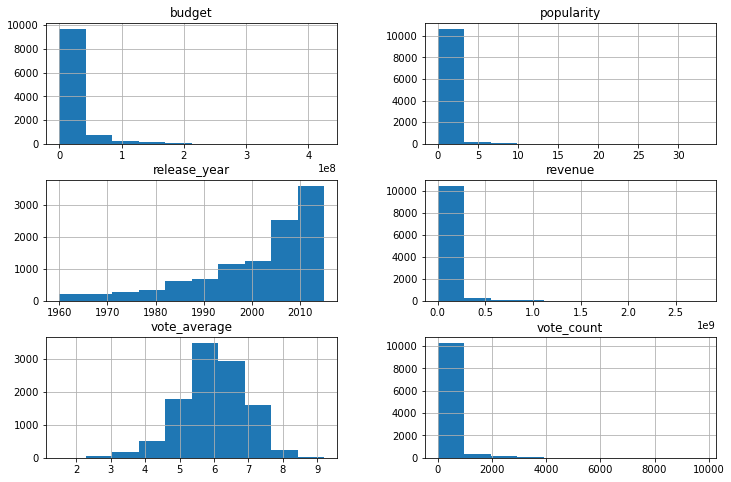

In [18]:
# explore and visualize the data 
df.hist(figsize=(12,8));

### Research Question 1: What is the most year that has released many movies?

Text(0, 0.5, 'Number of Movies')

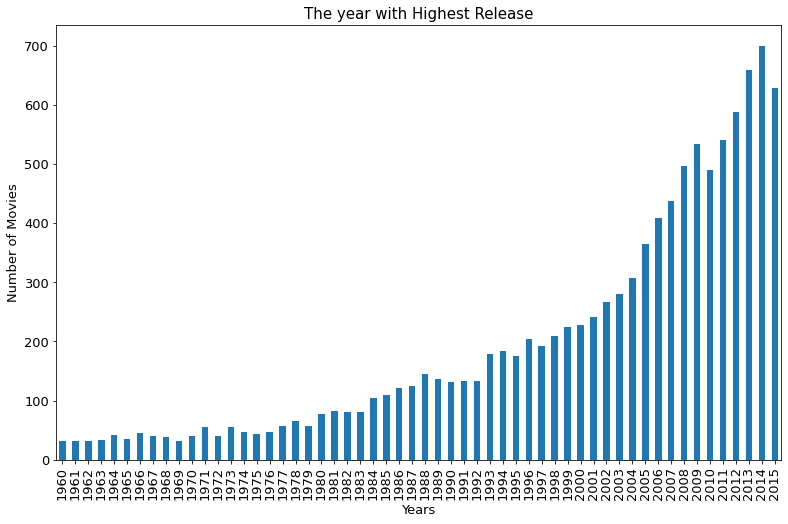

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
num_of_movies= df.groupby('release_year').count().original_title
num_of_movies.plot(kind= 'bar',figsize = (13,8),fontsize=13)
plt.title("The year with Highest Release",fontsize=15)
plt.xlabel('Years',fontsize=13)
plt.ylabel('Number of Movies',fontsize= 13)

> As we can see above, the highest year in which movies have been released is 2014 then 2013 and the last thing is 2015.

### Research Question 2: Does vote average affect profits?

In [24]:
# function to plot scatter chart
def display_scatterplot(variable_x, variable_y, xlabel, ylabel, title):
    df.plot(x=variable_x, y=variable_y, kind='scatter', figsize = (13,8),fontsize=13)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel,fontsize=13)
    plt.ylabel(ylabel,fontsize= 13)

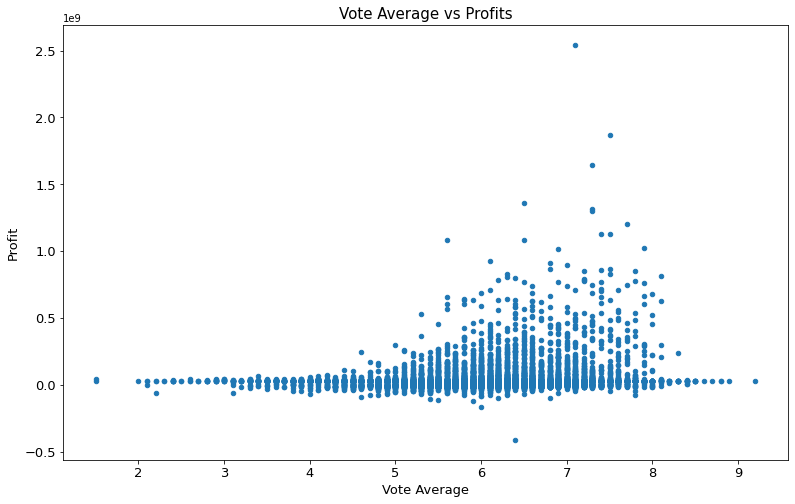

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['profit'] = df['revenue'] - df['budget']
display_scatterplot('vote_average','profit', 'Vote Average', 'Profit', "Vote Average vs Profits")

> As we can see above, There is a positive relationship between X and Y. Profit is affected by the vote. So, movies with a high vote will earn a high profit.

### Research Question 3: Does popularity affect profits?

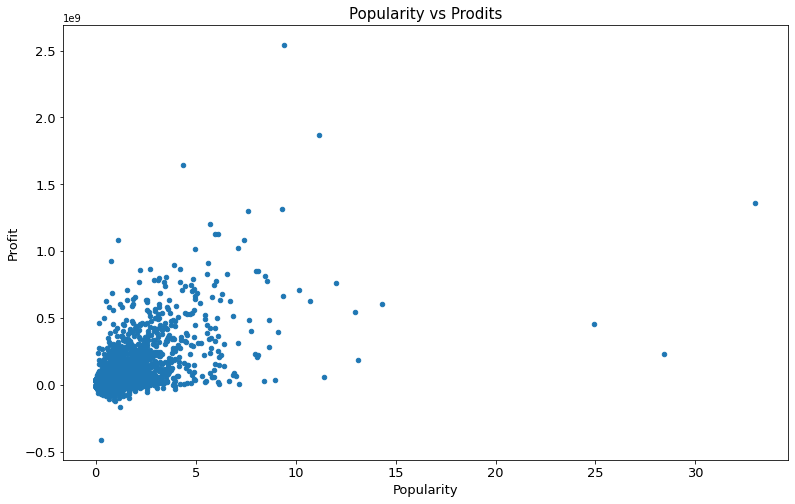

In [22]:
display_scatterplot('popularity','profit', 'Popularity', 'Profit', "Popularity vs Prodits")

> There is a positive relationship between X and Y. Profit is affected by popularity. So, movies with high popularity will earn a high profit.

<a id='conclusions'></a>
## Conclusions

>- Result from Q1: As we see in the chart, 2014 has the highest year of release. After that 2013, then 2015.
>- Result from Q2: movies with a high vote will earn a high profit.
>- Result from Q3: Profit is affected by popularity. So, movies with high popularity will earn a high profit.

**Limitations**
> There is some limitation in the dataset, The budget and revenue attributes have some zero values that affect the analysis process and I had solved the problem by calculating the mean and replace it with the zero values.

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1